# Desicion Tree Classification
<img src="img/Desicion-T.png" width="800">

In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("csv/dtc.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace = True)


data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)



In [11]:
# normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

score:  0.9186046511627907


# Random Forest Classification
<img src="img/randomforest.png" width="800" height="800">

In [14]:
#%% decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("decision tree score: ", dt.score(x_test,y_test))

decision tree score:  0.9069767441860465


In [15]:
#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


# Evaluation Classification Models
<img src="img/confusion-matrix.png" width="800" height="800">

In [17]:
#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


In [18]:
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

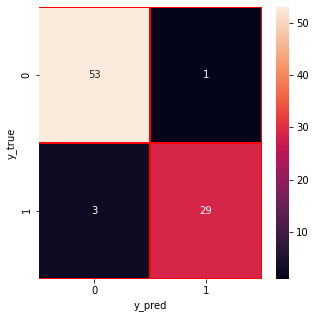

In [19]:
# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()